# Fecha de entrega: 27/08/2022 (corresponde a clase 20)

# Reajuste de base de datos de BTC_pattern_indicators

El objetivo de este notebook es reajustar el data set "BTC_pattern_indicators.csv" según las conclusiones alcanzadas al momento de llevarse a cabo su corerspondiente análisis univariado, bivariado y multivariado (ver, "Primera entrega.docx", "Metadata.docx", y/o "Análisis univariado, bivariado y multivariado de BTC_patterns_indicators.ipynb"). 

En concreto, se procederá a eliminar las variables originales del data set que fueron descartadas según los criterios establecidos en el punto 7 del documento "Primera entrega.docx", y se agregarán las variables [Trend] y [Residuals] (propias de una serie de tiempo).

Así, el data set "BTC_pattern_indicators_fv.csv" (que se crea al final de este notebook) solo requerirá manipulaciones menores al momento de ser procesado por los diversos modelos de ML en lo que resta del proyecto.

# Librerías

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_pattern_indicators

In [34]:
# Se carga la base de datos de BTC_pattern_indicators desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/1QMbvlXkIhHZsGySv5LD7ltnY7Kzwc2Ra/view?usp=sharing"

In [4]:
dwn_url=gdriveColabPath(sharing_url)
BTC_pattern_indicators_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_pattern_indicators_df.head()

,date,close,open,high,low,vol,Percentage_diff,target,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data wrangling

Según se puede leer en el documento de trabajo "Primera entrega.docx", item 7, luego de ejecutarse el análisis univariado, bivariado y multivariado de "BTC_pattern_indicators.csv", se redujo la cantidad de variables del data set según diversos criterios de selección allí explicitados.

En primera instancia se eliminarán las variables que no se van a utilizar, y en un segundo término, se agregarán las variables ausentes en BTC_pattern_indicators.csv que se consideraron relevantes incoprotar para el momento del modelado (i.e. [Trend] y [Residuals]).

In [5]:
BTC_pattern_indicators_df.columns

Index(['date', 'close', 'open', 'high', 'low', 'vol', 'Percentage_diff',
       'target', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE',
       'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS',
       'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY',
       'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK',
       'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI',
       'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR',
       'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER',
       'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE',
       'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS',
       'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH',
       'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU',
       'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR',
       'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN',

PASO 1 -> se eliminan las variables que no se van a utilizar

In [6]:
BTC_pattern_indicators_reduced = BTC_pattern_indicators_df [['date', 'close', 'open', 'high', 'low', 'vol', 'Percentage_diff',
       'target', 'CDL3OUTSIDE', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLCLOSINGMARUBOZU', 'CDLDOJISTAR', 'CDLENGULFING', 
       'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE',
       'CDLHIKKAKE', 'CDLLONGLINE', 'CDLMARUBOZU',
       'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE',
       'CDLSPINNINGTOP', 'CDLXSIDEGAP3METHODS']].copy()

In [7]:
# Se revisa las columnas del nuevo dataframe
BTC_pattern_indicators_reduced.columns

Index(['date', 'close', 'open', 'high', 'low', 'vol', 'Percentage_diff',
       'target', 'CDL3OUTSIDE', 'CDLADVANCEBLOCK', 'CDLBELTHOLD',
       'CDLCLOSINGMARUBOZU', 'CDLDOJISTAR', 'CDLENGULFING', 'CDLHARAMI',
       'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLLONGLINE',
       'CDLMARUBOZU', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE',
       'CDLSPINNINGTOP', 'CDLXSIDEGAP3METHODS'],
      dtype='object')

In [8]:
# Se revisa la cantidad de datos en cada variable/columna del nuevo dataframe
BTC_pattern_indicators_reduced.count()

date                   4386
close                  4386
open                   4386
high                   4386
low                    4386
vol                    4386
Percentage_diff        4386
target                 4386
CDL3OUTSIDE            4386
CDLADVANCEBLOCK        4386
CDLBELTHOLD            4386
CDLCLOSINGMARUBOZU     4386
CDLDOJISTAR            4386
CDLENGULFING           4386
CDLHARAMI              4386
CDLHARAMICROSS         4386
CDLHIGHWAVE            4386
CDLHIKKAKE             4386
CDLLONGLINE            4386
CDLMARUBOZU            4386
CDLSEPARATINGLINES     4386
CDLSHOOTINGSTAR        4386
CDLSHORTLINE           4386
CDLSPINNINGTOP         4386
CDLXSIDEGAP3METHODS    4386
dtype: int64

No hay registro NaN

Paso 2 -> se calcula y agregan las columnas ausentes [Trend] y [Residuals]

In [9]:
BTC_pattern_indicators_reduced.dtypes

date                    object
close                  float64
open                   float64
high                   float64
low                    float64
vol                    float64
Percentage_diff        float64
target                 float64
CDL3OUTSIDE              int64
CDLADVANCEBLOCK          int64
CDLBELTHOLD              int64
CDLCLOSINGMARUBOZU       int64
CDLDOJISTAR              int64
CDLENGULFING             int64
CDLHARAMI                int64
CDLHARAMICROSS           int64
CDLHIGHWAVE              int64
CDLHIKKAKE               int64
CDLLONGLINE              int64
CDLMARUBOZU              int64
CDLSEPARATINGLINES       int64
CDLSHOOTINGSTAR          int64
CDLSHORTLINE             int64
CDLSPINNINGTOP           int64
CDLXSIDEGAP3METHODS      int64
dtype: object

In [11]:
# Se convierte la varibale [Date] a datetime64 a fin de poder calcular la descomposición de la serie de tiempo (var=[Price])
BTC_pattern_indicators_reduced ["date"] = pd.to_datetime (BTC_pattern_indicators_reduced ["date"])

In [12]:
BTC_pattern_indicators_reduced.dtypes

date                   datetime64[ns]
close                         float64
open                          float64
high                          float64
low                           float64
vol                           float64
Percentage_diff               float64
target                        float64
CDL3OUTSIDE                     int64
CDLADVANCEBLOCK                 int64
CDLBELTHOLD                     int64
CDLCLOSINGMARUBOZU              int64
CDLDOJISTAR                     int64
CDLENGULFING                    int64
CDLHARAMI                       int64
CDLHARAMICROSS                  int64
CDLHIGHWAVE                     int64
CDLHIKKAKE                      int64
CDLLONGLINE                     int64
CDLMARUBOZU                     int64
CDLSEPARATINGLINES              int64
CDLSHOOTINGSTAR                 int64
CDLSHORTLINE                    int64
CDLSPINNINGTOP                  int64
CDLXSIDEGAP3METHODS             int64
dtype: object

In [14]:
# Se crea y reindexa BTC_ind_mom_ET_df_reduced_2 con la variable [Date] como nuevo índice
BTC_pattern_indicators_reduced_2 = BTC_pattern_indicators_reduced.set_index("date")

In [16]:
# Se procede a calcular las variables [Trend] y [Residuals] y a agregarlas a BTC_metals_df_reduced
descomposicion = sm.tsa.seasonal_decompose(BTC_pattern_indicators_reduced_2 ['close'], model='additive')

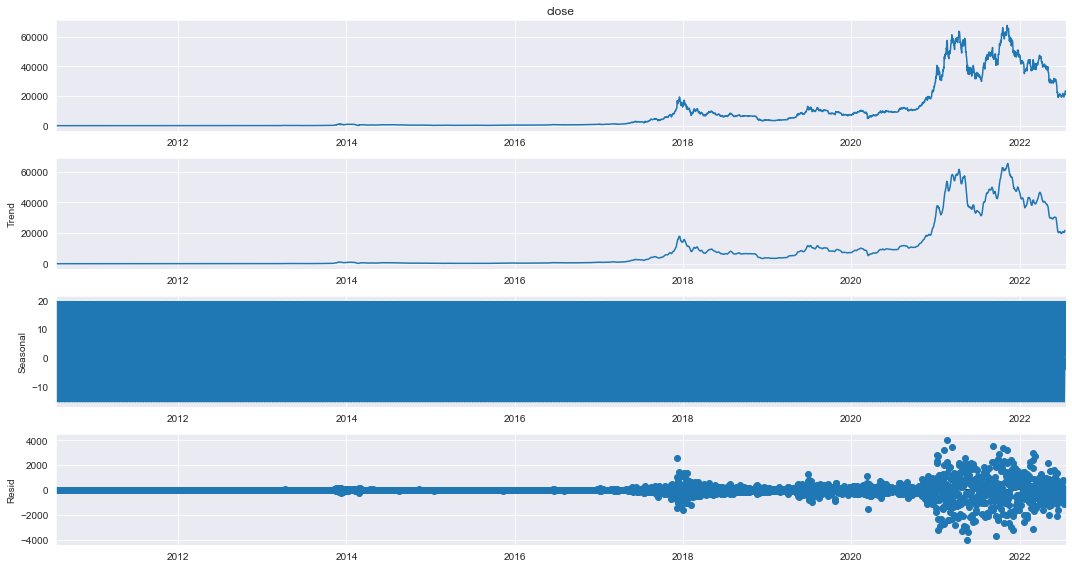

In [17]:
# Se grafica la descomposición de la serie de tiempo
fig = descomposicion.plot()
fig.set_size_inches((15, 8))
fig.tight_layout()
plt.show()

In [18]:
# Se obtienen los valores de las residualidad y tendencia
resid = descomposicion.resid
trend = descomposicion.trend

In [19]:
# Se crea un data set que se utilizará para concatenarlo a la copia de BTC_metals_df_reduced que se creará debajo (BTC_metals_reduced_df_3)
descomposicion_df = pd.DataFrame ()

In [20]:
# Se copias los valore a las columnas del nuevo data set
descomposicion_df ["Trend"] = trend.values
descomposicion_df ["Residuals"] = resid.values

In [21]:
# Se analizan los valores del data set que se concatenará debajo con la copia de BTC_metals_df_reduced que se creará oportunamente (BTC_metals_reduced_df_3)
descomposicion_df.count()

Trend        4380
Residuals    4380
dtype: int64

In [22]:
descomposicion_df.isnull().sum()

Trend        6
Residuals    6
dtype: int64

In [23]:
# Tres registros NaN
descomposicion_df.head()

,Trend,Residuals
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,0.1,-19.575231
4,0.1,15.128694


In [24]:
# Aquí se ven los tres registro NaN que faltaban para completar los 4386 de BTC_pattern_indicators_df_reduced (y tablas copias/modificadas)
descomposicion_df.tail()

,Trend,Residuals
4381,21370.371429,-160.287691
4382,21784.528571,-994.949467
4383,NaN,NaN
4384,NaN,NaN
4385,NaN,NaN


In [26]:
# Se crea la tabla que se concatenerá y que fue referida en los comentarios arriba como BTC_pattern_indicators_fv.csv
BTC_pattern_indicators_reduced_3 = BTC_pattern_indicators_reduced.copy()

In [27]:
# Se revisan sus columnas para chequear que [Date] no es el índice como en BTC_metals_df_reduced_2
BTC_pattern_indicators_reduced_3.columns

Index(['date', 'close', 'open', 'high', 'low', 'vol', 'Percentage_diff',
       'target', 'CDL3OUTSIDE', 'CDLADVANCEBLOCK', 'CDLBELTHOLD',
       'CDLCLOSINGMARUBOZU', 'CDLDOJISTAR', 'CDLENGULFING', 'CDLHARAMI',
       'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLLONGLINE',
       'CDLMARUBOZU', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE',
       'CDLSPINNINGTOP', 'CDLXSIDEGAP3METHODS'],
      dtype='object')

In [29]:
# Concatenando descomposicion_df con BTC_metals_df_reduced_3 en una nueva base de datos => BTC_metals_reduced_4
BTC_pattern_indicators_reduced_4 = pd.concat([BTC_pattern_indicators_reduced_3, descomposicion_df], axis=1, join="inner")

In [30]:
BTC_pattern_indicators_reduced_4.head()

,date,close,open,high,low,vol,Percentage_diff,target,CDL3OUTSIDE,CDLADVANCEBLOCK,CDLBELTHOLD,CDLCLOSINGMARUBOZU,CDLDOJISTAR,CDLENGULFING,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLLONGLINE,CDLMARUBOZU,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLXSIDEGAP3METHODS,Trend,Residuals
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,-19.575231
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,15.128694


In [31]:
BTC_pattern_indicators_reduced_4.tail()

,date,close,open,high,low,vol,Percentage_diff,target,CDL3OUTSIDE,CDLADVANCEBLOCK,CDLBELTHOLD,CDLCLOSINGMARUBOZU,CDLDOJISTAR,CDLENGULFING,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLLONGLINE,CDLMARUBOZU,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLXSIDEGAP3METHODS,Trend,Residuals
4381,2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21370.371429,-160.287691
4382,2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,21784.528571,-994.949467
4383,2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,0,0,100,0,0,0,0,0,0,0,100,0,0,0,0,0,0,NaN,NaN
4384,2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4385,2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,NaN,NaN


Paso 3 -> se crea la base de datos "BTC_pattern_indicators_fv.csv" que se modelará según diversos modelos de ML en lo que resta del proyecto.

In [33]:
BTC_pattern_indicators_reduced_4.to_csv ("D:\Luciano\Programación\Data science\Trabajo final\Bases de datos para modelos\BTC_pattern_indicators_fv.csv", index=False, sep=";")